In [2]:
import numpy as np
import pandas as pd

p0 = 1.0

K = 4

def f(x):
    return x**4 + 3*x**2 - 2

def g1(x): 
    return np.sqrt((2 - x**4)/3.0)
def g2(x): 
    return (2 - 3.0*x**2)**0.25
def g3(x): 
    return (2 - x**4)/(3.0*x)
def g4(x): 
    return np.cbrt((2 - 3.0*x**2)/x)

def fixed_point(p0, max_it, g):

    p = np.zeros(max_it+1)

    p[0] = p0

    i = 1

    while i <= max_it:
        try:
            p[i] = g(p[i-1])
        except:
            return p[:i]
        i += 1

    return p


P1 = fixed_point(p0, K, g1)

P2 = fixed_point(p0, K, g2)

P3 = fixed_point(p0, K, g3)

P4 = fixed_point(p0, K, g4)

df = pd.DataFrame(
    {
        'g1': P1[:K+1],
        'g2': P2[:K+1],
        'g3': P3[:K+1],
        'g4': P4[:K+1]
    },
    index=[f'p{i}' for i in range(K+1)]
)

pd.options.display.float_format = '{:,.5f}'.format

df


/var/folders/yx/xwgyyhkn2q70lkg06rg9k5l00000gn/T/ipykernel_4122/3500971707.py:14: RuntimeWarning: invalid value encountered in scalar power
  return (2 - 3.0*x**2)**0.25


,g1,g2,g3,g4
p0,1.00000,1.00000,1.00000,1.00000
p1,0.57735,NaN,0.33333,-1.00000
p2,0.79349,NaN,1.98765,1.00000
p3,0.73111,NaN,-2.28218,-1.00000
p4,0.75593,NaN,3.67003,1.00000


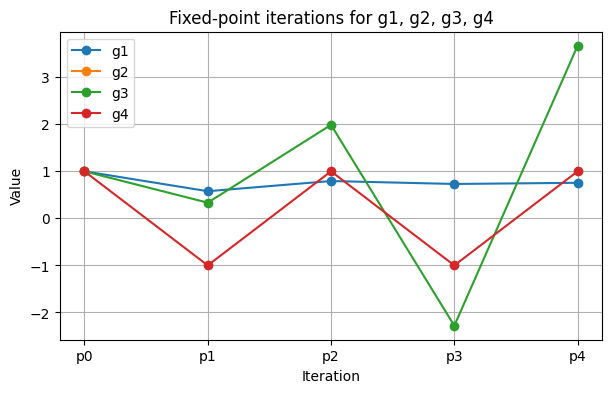

In [ ]:
## Plotting the results to visualize convergence behavior

import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
for col in df.columns:
    plt.plot(df.index, df[col], marker='o', label=col)

plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Fixed-point iterations for g1, g2, g3, g4')
plt.legend()
plt.grid(True)
plt.show()
